#  Digital to Analog Conversion

Digital-to-Analog Conversion (DAC) is the process by which digital signals, which have discrete values (typically in binary form), are converted into analog signals, which have continuous values. This conversion is essential in many systems because while it's efficient to process or store signals in digital form, many real-world systems and processes still function in the analog domain.

For example, the sound that we hear is analog. However, the music stored on your digital device (like an MP3 player or a smartphone) is in digital form. To listen to the music through speakers or headphones, the device must convert the digital music files into an analog signal, which is then fed into the speakers and heard as sound. This conversion is performed by a Digital-to-Analog Converter (DAC).

A simple example of a DAC is the binary-weighted resistor network:

1. A binary digital signal is fed as input.
2. Each bit in the digital signal is assigned a specific voltage level based on its weight ($2^0$, $2^1$, $2^2$, etc.).
3. Each bit controls a switch that connects a specific resistor to an output circuit.
4. The voltages associated with the activated resistors (where the bit is a 1) are summed together to produce an analog output voltage.

However, the binary-weighted method is one of the simplest ways to visualize a DAC, and in practice, many modern DACs use more complex methods and architectures like the R-2R ladder network, delta-sigma modulation, etc., to improve accuracy, resolution, and other performance metrics.

On the flip side, the Analog-to-Digital Converter (ADC) does the opposite: it converts continuous analog signals to discrete digital values.


## Mathematical Formulation:

For a 4-bit DAC with input bits $( b_3, b_2, b_1, b_0)$, where $( b_3 )$ 
is the most significant bit (MSB) and $( b_0 )$ is the least significant bit (LSB), the analog output voltage $( V_{out} )$ can be formulated as:

$$
[ V_{out} = b_3 \times V_{ref} \times \frac{8}{16} + b_2 \times V_{ref} \times \frac{4}{16} + b_1 \times V_{ref} \times \frac{2}{16} + b_0 \times V_{ref} \times \frac{1}{16} ]
$$

Where:
- $( V_{ref} )$ is the reference voltage of the DAC.
- Each term represents the binary-weighted value for each bit.

## Python Implementation:

In [2]:
def dac_output(binary_input, V_ref):
    """
    Calculate the output of a 4-bit DAC for a given binary input.

    :param binary_input: A string of 4 bits, e.g., "1010".
    :param V_ref: Reference voltage of the DAC.
    :return: Analog output voltage.
    """
    if len(binary_input) != 4 or not set(binary_input).issubset({"0", "1"}):
        raise ValueError("binary_input must be a 4-bit binary string.")

    # Mapping each bit to its weighted value
    weights = [8/16, 4/16, 2/16, 1/16]

    V_out = sum(int(bit) * weight * V_ref for bit, weight in zip(binary_input, weights))
    return V_out


# Example:
binary_input = ["1010", "0101", "1111", "0000"]
V_ref = 5.0  # Let's assume the reference voltage is 5 volts.
for b_input in binary_input:
    output_voltage = dac_output(b_input, V_ref)
    print(f"For binary input {b_input}, the DAC output voltage is: {output_voltage:.2f} V")

For binary input 1010, the DAC output voltage is: 3.12 V
For binary input 0101, the DAC output voltage is: 1.56 V
For binary input 1111, the DAC output voltage is: 4.69 V
For binary input 0000, the DAC output voltage is: 0.00 V


# Analog to Digital Conversion

Similarity, the Analog-to-Digital Converter (ADC) converts continuous analog signals to discrete digital values. The ADC is a critical component in many systems because while it's efficient to process or store signals in digital form, many real-world systems and processes still function in the analog domain.

## Mathematical Formulation:

For a simple 4-bit ADC with a full-scale reference voltage $( V_{ref} )$, the analog input voltage $( V_{in} )$ will be quantized into one of 16 (from $( 0 )$ to $( 2^4-1 )$) possible values. The range for each possible value (or "quantization level") is:

$$
[ \Delta V = \frac{V_{ref}}{2^4} ]
$$

The digital output will be the integer value of $( \frac{V_{in}}{\Delta V} )$, but it must not exceed $( 2^4-1 )$.

## Python Implementation:



In [7]:
def adc_output(V_in, V_ref):
    """
    Calculate the output of a 4-bit ADC for a given analog input voltage.

    :param V_in: Input analog voltage.
    :param V_ref: Reference voltage of the ADC.
    :return: 4-bit binary string representation.
    """
    if V_in > V_ref:
        raise ValueError("Input voltage exceeds reference voltage.")
    
    quantization_levels = 2**4
    delta_V = V_ref / quantization_levels
    
    digital_value = round(V_in / delta_V)  # Use rounding here
    binary_output = format(digital_value, '04b')  # Convert to 4-bit binary string
    
    return binary_output


# Example:
V_in = [3.12, 1.56, 4.69, 0.00]
V_ref = 5.0  # Reference voltage, same as before

for v in V_in:
    binary_output = adc_output(v, V_ref)
    print(f"For input voltage {v} V, the ADC output is: {binary_output}")

For input voltage 3.12 V, the ADC output is: 1010
For input voltage 1.56 V, the ADC output is: 0101
For input voltage 4.69 V, the ADC output is: 1111
For input voltage 0.0 V, the ADC output is: 0000



This program models a simple 4-bit ADC. Given an analog input voltage and a reference voltage, it provides the 4-bit binary representation of that voltage. Note that this is a very basic ADC model, and real-world ADCs will have many other factors like resolution, sampling rate, etc., to consider.

True


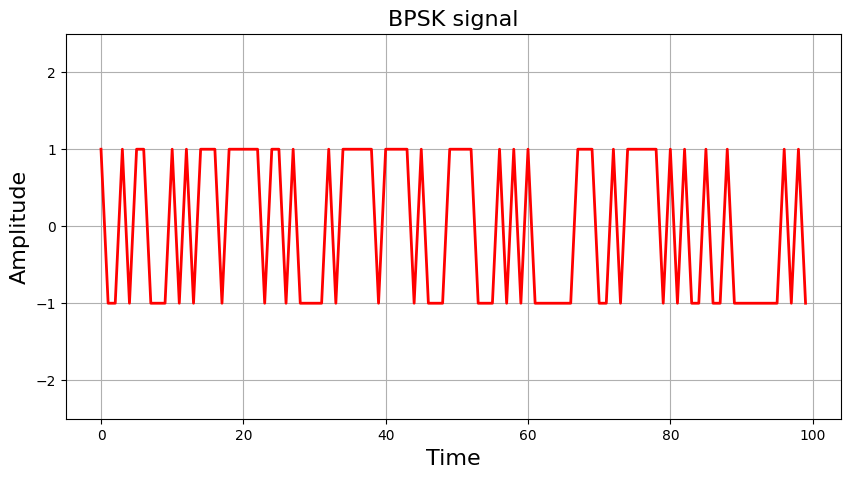

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机二进制数据
data = np.random.randint(0, 2, 100)  # 100个随机二进制位

# BPSK调制
# 0位映射到-1，1位映射到1
bpsk_signal = 2 * data - 1

# 在此处，bpsk_signal可以通过通信信道发送

# BPSK解调
# 负值映射回0，正值映射回1
demodulated_data = (bpsk_signal + 1) / 2

# 验证解调数据与原始数据是否匹配
print(np.array_equal(data, demodulated_data))  # 输出应为True

# Plot the signal as a line plot
plt.figure(figsize=(10, 5))
plt.plot(bpsk_signal, color='red', lw=2)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid(True)
plt.ylim([-2.5, 2.5])
plt.title('BPSK signal', fontsize=16)
plt.show()


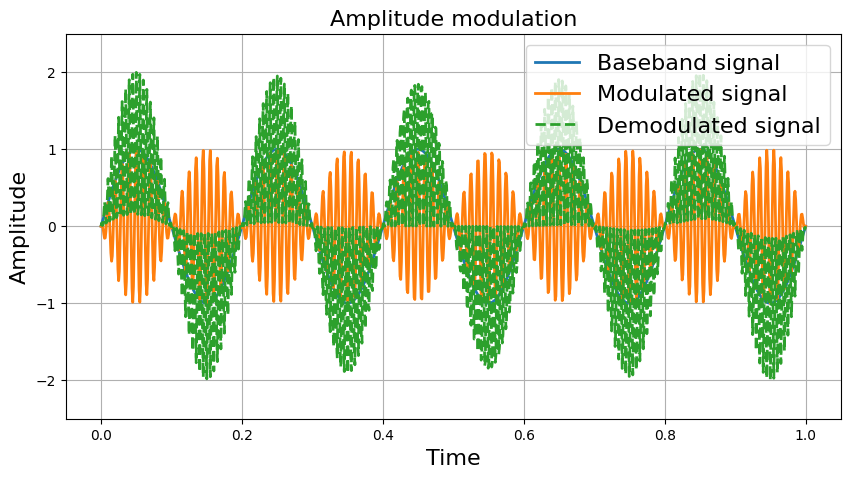

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个简单的基带信号（例如，一个正弦波）
t = np.linspace(0, 1, 1000)  # 时间轴
baseband_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz的基带信号

# 调制过程
carrier_frequency = 100  # 100 Hz的载波频率
carrier_wave = np.cos(2 * np.pi * carrier_frequency * t)  # 载波波形
modulated_signal = baseband_signal * carrier_wave  # 幅度调制（AM）

# 在此处，modulated_signal可以通过无线信道传输

# 解调过程
# 我们简单地将调制信号乘以载波波形以恢复基带信号
demodulated_signal = modulated_signal * carrier_wave * 2  # 乘以2是为了消除幅度减半的影响

# 绘制信号
plt.figure(figsize=(10, 5))
plt.plot(t, baseband_signal, lw=2, label='Baseband signal')
plt.plot(t, modulated_signal, lw=2, label='Modulated signal')
plt.plot(t, demodulated_signal, '--', lw=2, label='Demodulated signal')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid(True)
plt.ylim([-2.5, 2.5])
plt.legend(loc='upper right', fontsize=16)
plt.title('Amplitude modulation', fontsize=16)
plt.show()